#Importing the Dataset

In [38]:
#Import library for reading the dataset  
import pandas as pd
import numpy as np

In [39]:
#Import the dataset and store it in a variable named dataset
dataset = pd.read_csv('loan_data.csv')

In [40]:
#Now we peek at the top of the datset. Notice that missing values are stored as NaN.
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740,39.5,0,1,0,0


In [41]:
dataset.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672.0,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722.0,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687.0,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692.0,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732.0,4740.000000,37879,57.0,6,0,0,1


Now we do a general check to see if there are any missing values and then count their number

In [42]:
dataset.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                   True
fico                  True
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [43]:
#Now this will count the number of missing values in each column
dataset.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  1
fico                 1
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

**Handling Missing Data**

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(dataset[['dti','fico']])
dataset[['dti','fico']] = imputer.transform(dataset[['dti','fico']])
#Now we check the dataset for the missing values.
dataset.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [45]:
#Now this will count the number of missing values in each column
dataset.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

**Handling noicy value**

In [46]:
#checking ouliers
dataset[dataset['revol.bal']<0]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6,1,debt_consolidation,0.1496,194.02,10.714418,4.0,667.0,3180.041667,-3839,76.8,0,0,1,1


In [47]:
# Remove the outliers from the Dataset points
dataset= dataset[~(dataset['revol.bal']<0)]

In [48]:
#checking ouliers
dataset[dataset['revol.bal']<0]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


**Data Transformation**

***Categorical Encoding***

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9577 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9577 non-null   int64  
 1   purpose            9577 non-null   object 
 2   int.rate           9577 non-null   float64
 3   installment        9577 non-null   float64
 4   log.annual.inc     9577 non-null   float64
 5   dti                9577 non-null   float64
 6   fico               9577 non-null   float64
 7   days.with.cr.line  9577 non-null   float64
 8   revol.bal          9577 non-null   int64  
 9   revol.util         9577 non-null   float64
 10  inq.last.6mths     9577 non-null   int64  
 11  delinq.2yrs        9577 non-null   int64  
 12  pub.rec            9577 non-null   int64  
 13  not.fully.paid     9577 non-null   int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 1.1+ MB


In [51]:
#The 0th column of X has non-ordinal or nominal data
#first label encode 1th column in dataset
X = dataset
labelencoder_X = LabelEncoder()
X.iloc[:,1] = labelencoder_X.fit_transform(X.iloc[:,1])
X.iloc[:,1]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0       2
1       1
2       2
3       2
4       1
       ..
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9577, dtype: int64

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [53]:
# again read the data as per the input
X = dataset.iloc[:,1:3].values
X

array([[2.    , 0.1189],
       [1.    , 0.1071],
       [2.    , 0.1357],
       ...,
       [2.    , 0.1071],
       [4.    , 0.16  ],
       [2.    , 0.1392]])

In [54]:
#Now we one-hot encode 0th column of X
onehotencoder = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

In [55]:
# converting 'Weight' from float to int
dataset['purpose'] = dataset['purpose'].astype(int)

In [58]:
# transform the data to get the encoding done
X_encoded = onehotencoder.fit_transform(X)
X_array = X_encoded.toarray()
X_list = X_array.tolist()


**Data** **Normalization and Reduction**

In [ ]:
#Feature scaling refers to putting the values in the same range or same scale so that no variable is dominated by the other.

# Numerical data in the dataset can have a varied range i.e. one parameter may lie between 1 to 10 for all records whereas another parameter can lie between 1000 to 5000. Though data is logically correct but after passing to a particular algorithm, the features with higher magnitude become key parameters for that algorithm.

# To avoid such situations feature scaling is performed using some statistical techniques like Min-Max scaling & Mean normalization. This creates a common range for all the parameters and thus removes Algorithmic bias.

# Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

#normalization on age and salary
dataset

In [60]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

df = dataset[['revol.bal','purpose','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths']]
dataset_minmax = min_max_scaler.fit_transform(df)
pd.DataFrame(dataset_minmax)

,0,1,2,3,4,5,6,7,8,9
0,0.023898,0.333333,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000
1,0.027848,0.166667,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000
2,0.002908,0.333333,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303
3,0.027885,0.333333,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303
4,0.003926,0.166667,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000
...,...,...,...,...,...,...,...,...,...,...
9572,0.178383,0.000000,0.355977,0.663709,0.346796,0.279070,0.589602,0.178383,0.689916,0.060606
9573,0.000152,0.000000,0.261804,0.514888,0.007009,0.511628,0.240596,0.000152,0.009244,0.151515
9574,0.008312,0.333333,0.088851,0.436785,0.436916,0.348837,0.187337,0.008312,0.696639,0.242424
9575,0.000000,0.666667,0.363354,0.468750,0.640187,0.372093,0.092838,0.000000,0.026891,0.151515


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9577 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9577 non-null   int64  
 1   purpose            9577 non-null   int64  
 2   int.rate           9577 non-null   float64
 3   installment        9577 non-null   float64
 4   log.annual.inc     9577 non-null   float64
 5   dti                9577 non-null   float64
 6   fico               9577 non-null   float64
 7   days.with.cr.line  9577 non-null   float64
 8   revol.bal          9577 non-null   int64  
 9   revol.util         9577 non-null   float64
 10  inq.last.6mths     9577 non-null   int64  
 11  delinq.2yrs        9577 non-null   int64  
 12  pub.rec            9577 non-null   int64  
 13  not.fully.paid     9577 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 1.1 MB


In [62]:
# converting from float to int
dataset['int.rate'] = dataset['int.rate'].astype(int)
dataset['installment'] = dataset['installment'].astype(int)
dataset['log.annual.inc'] = dataset['log.annual.inc'].astype(int)
dataset['dti'] = dataset['dti'].astype(int)
dataset['fico'] = dataset['fico'].astype(int)
dataset['days.with.cr.line'] = dataset['days.with.cr.line'].astype(int)
dataset['revol.util'] = dataset['revol.util'].astype(int)

In [ ]:
dataset.info()

#Data Visualization

Histogram

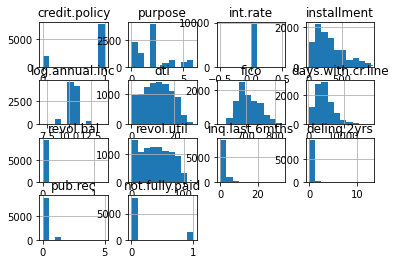

In [63]:
import matplotlib.pyplot as plt
dataset.hist()
plt.show()

**Correlation Matrix**

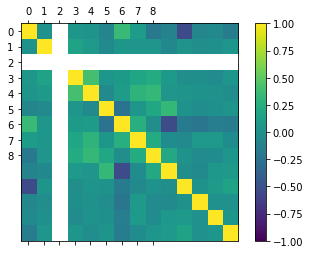

In [68]:
cor = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax =1)
fig.colorbar(cax)
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

**Scatter Plot**

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


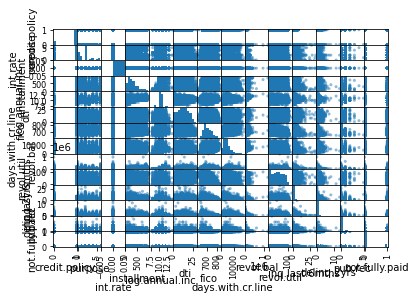

In [69]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()